# Лабораторная работа №3

ФИО:    Касрадзе Джамал Зурабович
Группа: БИВТ-21-5

Отправлять можно следующими способами:
1. Запушить этот ноутбук в GitHub в репозиторий, где у вас лежат ноутбуки с лабами

Deadlines:
- Занятие №7 в семестре (Занятие №3 очное)

Что необходимо сделать:  
- Обучить различного рода модели машинного обучения и сравнить их между собой  

---
## Читайте задание внимательно

Исходные данные:
1. В [табличке](https://docs.google.com/spreadsheets/d/11600OkqdRzxc-xZmFTuBs099VeAqU_GlE0Bx6bBlIRE/edit?usp=sharing) необходимо узнать название своего датасета 
2. Скачать нужны вам данные можно в [Google Drive](https://drive.google.com/drive/folders/1Phm-Fq1GL-VX7NS-DCEMRh_Fo1wU7DQ9?usp=sharing)
  
---
Теперь по пунктам, что я от вас жду:  
1. Загрузить необходимые данные к себе и считать (read) их в переменную.
2. Понять, у вас задача классификации (бинарной или многоклассовой) или регрессии (**если у вас многоклассовая классификация, прочтите P.S.S. внизу**).
3. Сделать предобработку данных:  
     1. Разделить выборку на тренировочную (train) и тестовую (test). _Обратите внимание, что обучать скейлеры и определять, какими значениями вы будете заполнять пропуски, вы будете на train выборке, а применять и на train, и на test_.
     2. Проверить пропуски в данных. Если они есть, заполнить одной из стратегий, предложенных в ноутбуке для семинара №3. P.S. Для численных и категориальных переменных будут разные стратегии.
     3. Отнормировать численные переменные (`StandardScaler`, `MinMaxScaler`).
     4. Закодировать категориальные признаки по одной из стратегий.
4. Обучить на тренировочном множестве:
     1. Линейную модель (`LogisticRegression`, `LinearRegression`)
     2. Деревянную модель (`DecisionTreeClassifier`, `DecisionTreeRegressor`) (тут советую попробовать разные глубины деревьев)
     3. K-ближайших соседей (`KNeighborsClassifier`, `KNeighborsRegressor`) (тут тоже есть смысл попробовать разные `k`)
     4. Случайный лес (`RandomForestClassifier`, `RandomForestRegressor`) 
5. Посчитайте метрики на train и test множествах:
     1. Для задачи классификации -- Accuracy, ROC-AUC (график + значение), PR-кривую (график), F1-score
     2. Для задачи регрессии -- MAE, RMSE, MAPE
6. Сравните метрики относительно train/test, так и относительно разных моделей. Ответьте на следующие вопросы:
     1. Какая модель справилась лучше с поставленной задачей?
     2. Имеет ли место переобучение?
     3. Имеет ли место недообучение?
     4. Как можно улучшить метрики моделей?

---
P.S.  
Просьба -- делать каждое задание в отдельных ячейках и с отдельными заголовками (как пункт 1 и 2 в этом ноутбуке) типа  
- Заголовок
- Ячейки с кодом
- Другой заголовок
- Другие ячейки с кодом

P.S.S.  
Если вам повезло с многоклассовой классификацией, вам будет необходимо понять, умеет ли алгоритм работать с несколькими классами одновременно (обычно они не умеют). Поэтому вам может понадобиться такая штука, как OneVsRestClassifier ([ссылка](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html#sklearn.multiclass.OneVsRestClassifier)), но советую ознакомиться с этой [страницей](https://scikit-learn.org/stable/modules/multiclass.html), здесь представлена более полная информация.

## 1. Пример импорта данных. Грузим данные

In [62]:
import pandas as pd
data = pd.read_csv('../L2/dataset.csv', sep=',')  # если нужно, можно поменять разделитель
data = data.query("(PROPERTYSQFT != 2184.207862) & (PRICE < 10000000) & (PRICE > 100) & (PROPERTYSQFT < 10000) & (PROPERTYSQFT > 256)")
data.set_index("PRICE")

,BROKERTITLE,TYPE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
PRICE,,,,,,,,,,,,,,,,
315000,Brokered by Douglas Elliman -111 Fifth Ave,Condo for sale,2,2.0,1400.0,2 E 55th St Unit 803,"New York, NY 10022","2 E 55th St Unit 803New York, NY 10022",New York County,New York,Manhattan,East 55th Street,Regis Residence,"Regis Residence, 2 E 55th St #803, New York, N...",40.761255,-73.974483
260000,Brokered by Sowae Corp,House for sale,4,2.0,2015.0,620 Sinclair Ave,"Staten Island, NY 10312","620 Sinclair AveStaten Island, NY 10312",United States,New York,Richmond County,Staten Island,Sinclair Avenue,"620 Sinclair Ave, Staten Island, NY 10312, USA",40.541805,-74.196109
69000,Brokered by COMPASS,Condo for sale,3,1.0,445.0,2 E 55th St Unit 908W33,"Manhattan, NY 10022","2 E 55th St Unit 908W33Manhattan, NY 10022",United States,New York,New York County,New York,East 55th Street,"2 E 55th St, New York, NY 10022, USA",40.761398,-73.974613
690000,Brokered by Sowae Corp,House for sale,5,2.0,4004.0,584 Park Pl,"Brooklyn, NY 11238","584 Park PlBrooklyn, NY 11238",United States,New York,Kings County,Brooklyn,Park Place,"584 Park Pl, Brooklyn, NY 11238, USA",40.674363,-73.958725
265000,Brokered by Pantiga Group Inc.,Co-op for sale,1,1.0,750.0,875 Morrison Ave Apt 3M,"Bronx, NY 10473","875 Morrison Ave Apt 3MBronx, NY 10473",Bronx County,The Bronx,East Bronx,Morrison Avenue,Parking lot,"Parking lot, 875 Morrison Ave #3m, Bronx, NY 1...",40.821586,-73.874089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1700000,Brokered by Ilite Realty Inc,Multi-family home for sale,3,7.0,7854.0,448 40th St,"Brooklyn, NY 11232","448 40th StBrooklyn, NY 11232",United States,New York,Kings County,Brooklyn,40th Street,"448 40th St, Brooklyn, NY 11232, USA",40.651222,-74.005780
945000,Brokered by Brown Harris Stevens,Condo for sale,2,2.0,903.0,2351 Adam Clayton Powell Jr Blvd Apt 614,"Manhattan, NY 10030",2351 Adam Clayton Powell Jr Blvd Apt 614Manhat...,New York,New York County,New York,Manhattan,2351,2351 Adam Clayton Powell Jr Blvd Apartment 614...,40.816711,-73.942050
2999999,Brokered by RE MAX Edge,Multi-family home for sale,15,9.0,3600.0,2825-2827 W 15th St,"Brooklyn, NY 11224","2825-2827 W 15th StBrooklyn, NY 11224",United States,New York,Kings County,Brooklyn,West 15th Street,"2825 W 15th St, Brooklyn, NY 11224, USA",40.578450,-73.982739


## 2. Понимаем, какая перед нами задача

In [ ]:
Нам нужно предсказать единственный параметр - цену. Это задача регрессии. Будем искать зависимость цены от площади.

## 3. Делаем предобработку данных

/tmp/ipykernel_29843/1281505369.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


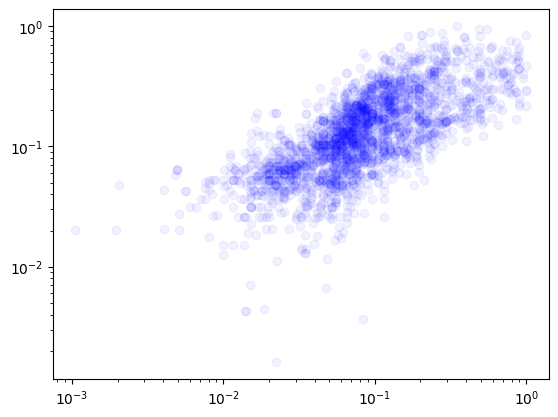

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
X = data['PRICE'].values
y = data['PROPERTYSQFT'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)
#пропусков данных нет, проверено в лабе 2
XTR_scaled = MinMaxScaler().fit_transform(X_train.reshape(-1, 1))
yTR_scaled = MinMaxScaler().fit_transform(y_train.reshape(-1, 1))
XTE_scaled = MinMaxScaler().fit_transform(X_test.reshape(-1, 1))
yTE_scaled = MinMaxScaler().fit_transform(y_test.reshape(-1, 1))
fig = plt.figure()
ax = plt.gca()
ax.plot(XTR_scaled, yTR_scaled, 'o', c='blue', alpha=0.05)
ax.set_yscale('log')
ax.set_xscale('log')
fig.show()

## 4. Обучить на тренировочном множестве
Аномальное количество квартир с одинаковой площалью вносит существенный вклад в форму графика. Но исключить я их(без вашего позволения) не могу, так каких очень много и они не похожи на ошибку, у всех разные параметры. Возможно это стандартный размер квартиры в нью йорке.

/tmp/ipykernel_29843/1052184580.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_29843/1052184580.py:20: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


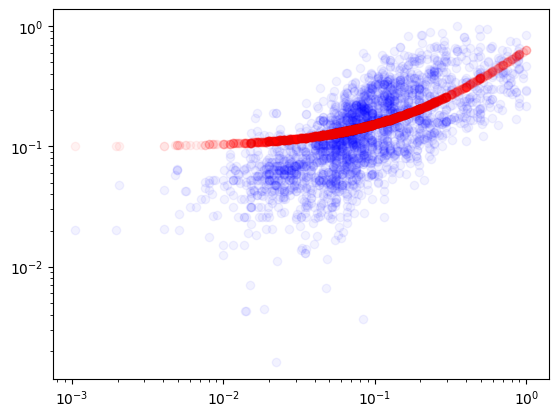

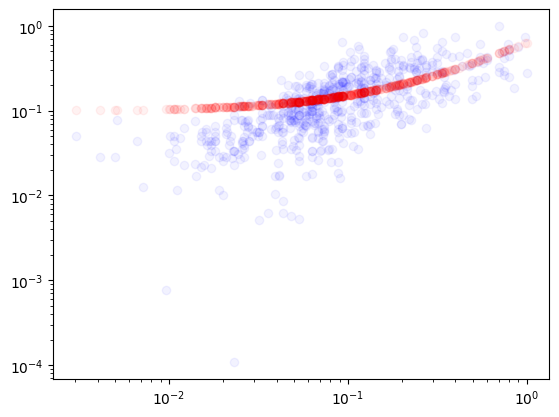

In [67]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(XTR_scaled.reshape(-1, 1), yTR_scaled)
lr_pred = lr.predict(XTR_scaled.reshape(-1, 1))
fig = plt.figure()
ax = plt.gca()
ax.plot(XTR_scaled, yTR_scaled, 'o', c='blue', alpha=0.05)
ax.plot(XTR_scaled, lr_pred, 'o', c='red', alpha=0.05)
ax.set_yscale('log')
ax.set_xscale('log')
fig.show()
#тестовые данные
fig = plt.figure()
ax = plt.gca()
lr_pred_test = lr.predict(XTE_scaled.reshape(-1, 1))
ax.plot(XTE_scaled, yTE_scaled, 'o', c='blue', alpha=0.05)
ax.plot(XTE_scaled, lr_pred_test, 'o', c='red', alpha=0.05)
ax.set_yscale('log')
ax.set_xscale('log')
fig.show()

## 5. Метрики

In [69]:
import sklearn.metrics as metrics
print("MAE:  ", 
    metrics.mean_absolute_error(yTR_scaled, lr_pred),
    metrics.mean_absolute_error(yTE_scaled, lr_pred_test) 
)
print("RMSE: ", 
    metrics.root_mean_squared_error(yTR_scaled, lr_pred),
    metrics.root_mean_squared_error(yTE_scaled, lr_pred_test) 
)
print("MAPE: ", 
    metrics.mean_absolute_percentage_error(yTR_scaled, lr_pred),
    metrics.mean_absolute_percentage_error(yTE_scaled, lr_pred_test) 
)
print("AVG  :",
      sum(lr_pred)/len(lr_pred),
      sum(lr_pred_test)/len(lr_pred_test)
)

MAE:   0.07865832130992478 0.08048802737925997
RMSE:  0.11128918246986526 0.10986057656390552
MAPE:  203862412428.92316 862008416380.1713
AVG  : [0.1683302] [0.16880733]


## 6. Сравнение

Тестовые результаты визульно сходятся с тренировочными. Значения ошибки рознятся, но не значительно. Модель тренировочная справилась лучше, что может быть признаком переобучения. Визуально предсказзание примерно следует тренду точек, так что говорить о сильном недообучении не приходится.